In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("anime.csv") #reading the data


In [4]:
df.sample(5)

,anime_id,name,genre,type,episodes,rating,members
659,28999,Charlotte,"Drama, School, Super Power",TV,13,7.91,310137
5255,13283,One Off,Slice of Life,OVA,4,6.50,9299
2398,1845,Gaiking: Legend of Daiku-Maryu,"Action, Mecha, Sci-Fi",TV,39,7.27,2640
11845,23475,Saimin Jutsu Zero Special,Hentai,Special,1,6.00,648
9725,31004,Niji no Kakehashi,"Drama, Kids",OVA,1,8.20,40


In [5]:
df.shape

(12294, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
# drop anime_id , type , episodes 
df.drop(columns=['anime_id','type','episodes'],inplace=True) #inplace = true makes the changes in the original object / data

In [8]:
df.head()

,name,genre,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,151266


In [9]:
df.isnull().sum() #check for missing values

name         0
genre       62
rating     230
members      0
dtype: int64

In [10]:
df.dropna(subset=['genre', 'rating'], inplace=True) #check for missing values in genre and rating and drop them 


In [11]:
# check for duplicate values
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum() #dropped 

name       0
genre      0
rating     0
members    0
dtype: int64

In [13]:
df.head()

,name,genre,rating,members
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37,200630
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,793665
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25,114262
3,Steins;Gate,"Sci-Fi, Thriller",9.17,673572
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,151266


In [14]:

#we will keep the name as it is since it is a label
#Standardize separators (remove inconsistent spacing)
df['genre'] = df['genre'].str.replace(r'\s*,\s*', ', ', regex=True)

In [15]:
#Split genre strings into lists
df['genre'] = df['genre'].str.split(', ')

In [16]:
 #Strip whitespace from each genre (just in case)
df['genre'] = df['genre'].apply(lambda x: [g.strip() for g in x])

In [17]:
df.head()

,name,genre,rating,members
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37,200630
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26,793665
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25,114262
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17,673572
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16,151266


EDA


In [18]:
import matplotlib.pyplot as plt

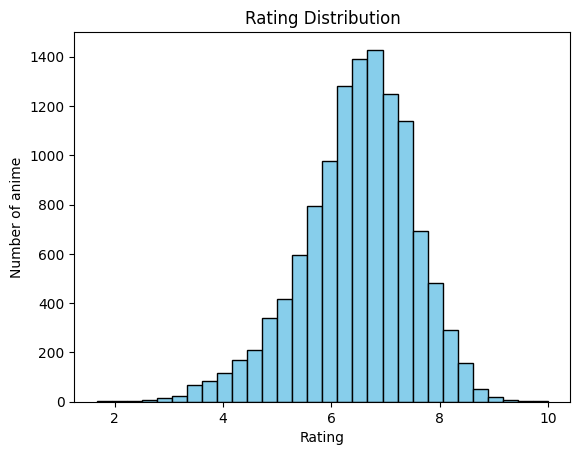

In [19]:
plt.hist(df.rating, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of anime')
plt.title('Rating Distribution')
plt.show()

In [20]:
df[['members']].describe() # we might need to normalize the members since some are really famous while some are not 

,members
count,1.201700e+04
mean,1.834888e+04
std,5.537250e+04
min,1.200000e+01
25%,2.250000e+02
50%,1.552000e+03
75%,9.588000e+03
max,1.013917e+06


In [21]:
df[['rating']].describe()

,rating
count,12017.000000
mean,6.478264
std,1.023857
min,1.670000
25%,5.890000
50%,6.570000
75%,7.180000
max,10.000000


In [22]:
from collections import Counter

# Flatten all genre lists into one big list
all_genres = [genre for sublist in df['genre'] for genre in sublist]

# Count frequency of each genre
genre_counts = Counter(all_genres)

# Convert to a DataFrame for easier viewing (optional)
genre_freq_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)


C:\Users\yashs\AppData\Local\Temp\ipykernel_24344\1918186022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


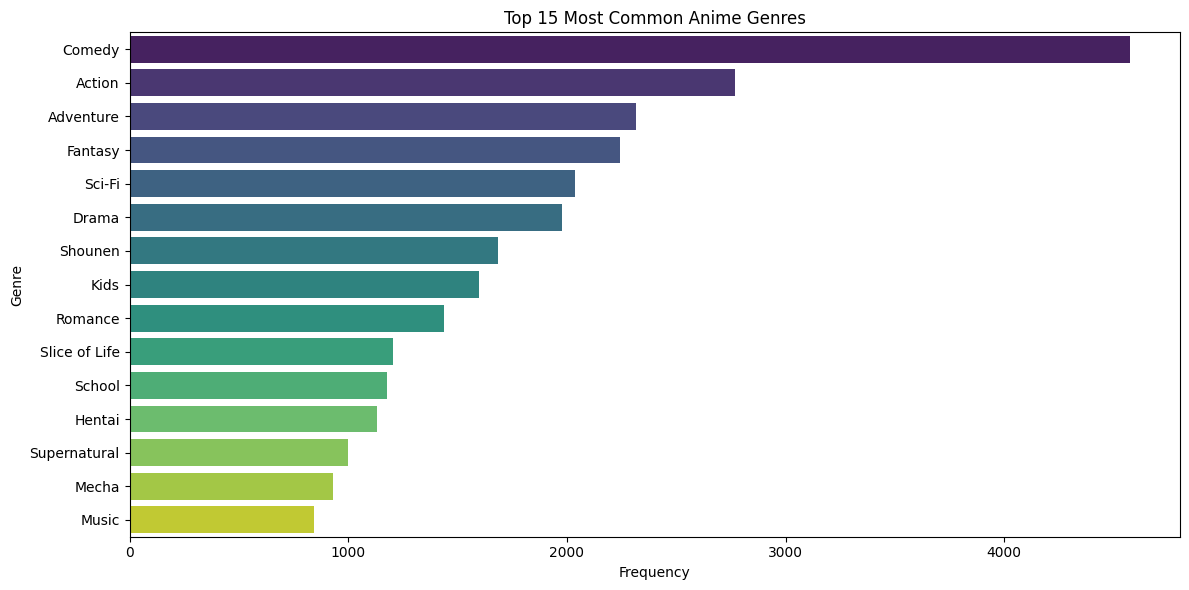

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top 15 genres
top_genres = genre_freq_df.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title('Top 15 Most Common Anime Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


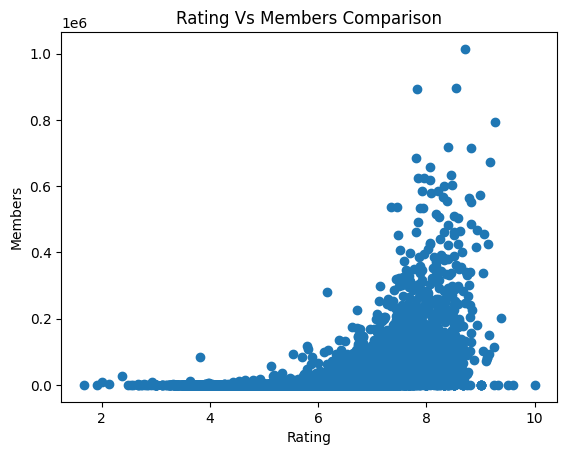

In [24]:
plt.scatter(df.rating, df.members)
plt.title("Rating Vs Members Comparison")
plt.xlabel("Rating")
plt.ylabel("Members")
plt.show() #higher members dont tend to have higher rating , even lower members can have higher ratings

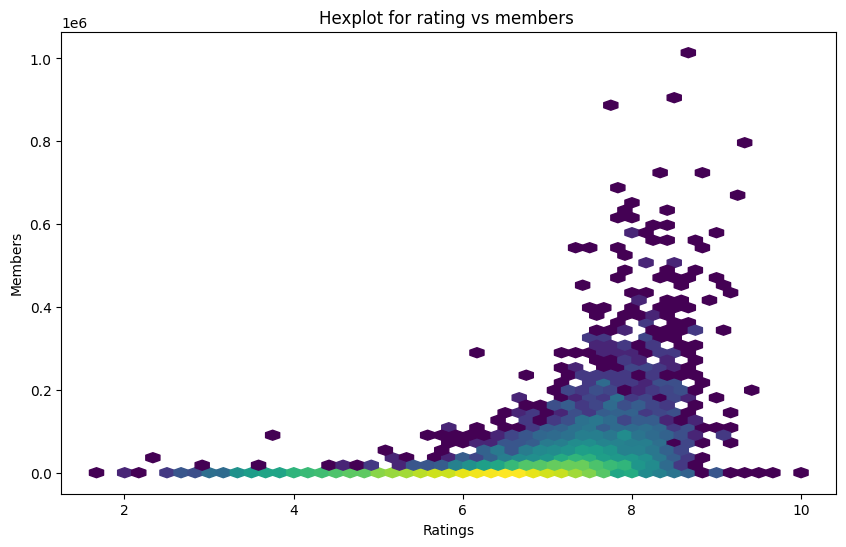

In [25]:
plt.figure(figsize=(10, 6))
plt.hexbin(df.rating, df.members, gridsize = 50,bins='log') 
plt.title('Hexplot for rating vs members ') 
plt.xlabel('Ratings')
plt.ylabel('Members')
plt.show() 

hmm scatterplot was confusing but hexbin was good , a lot of high rated anime have really low members , very few high members anime have high ratings 

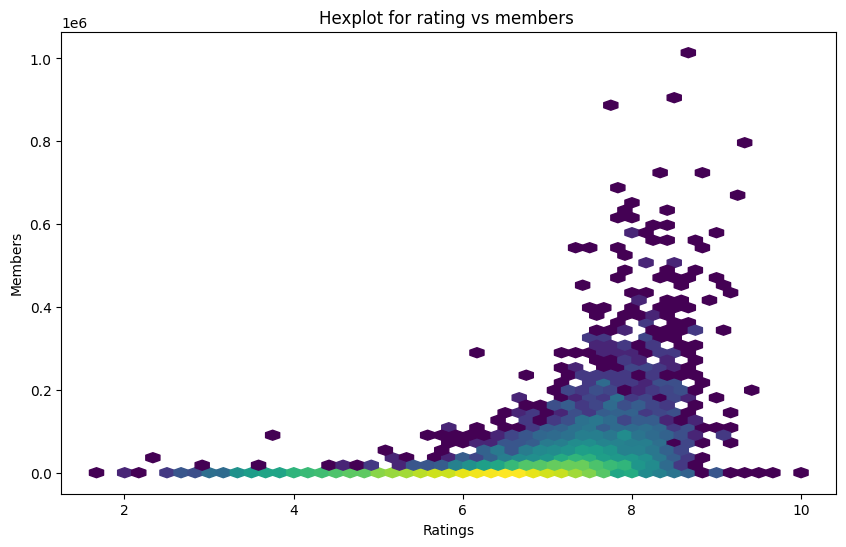

In [26]:
plt.figure(figsize=(10, 6))
plt.hexbin(df.rating, df.members, gridsize = 50,bins='log') 
plt.title('Hexplot for rating vs members ') 
plt.xlabel('Ratings')
plt.ylabel('Members')
plt.show() 

C:\Users\yashs\AppData\Local\Temp\ipykernel_24344\2927600701.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Rating', y='Genre', data=avg_genre_df.head(10), palette='crest')


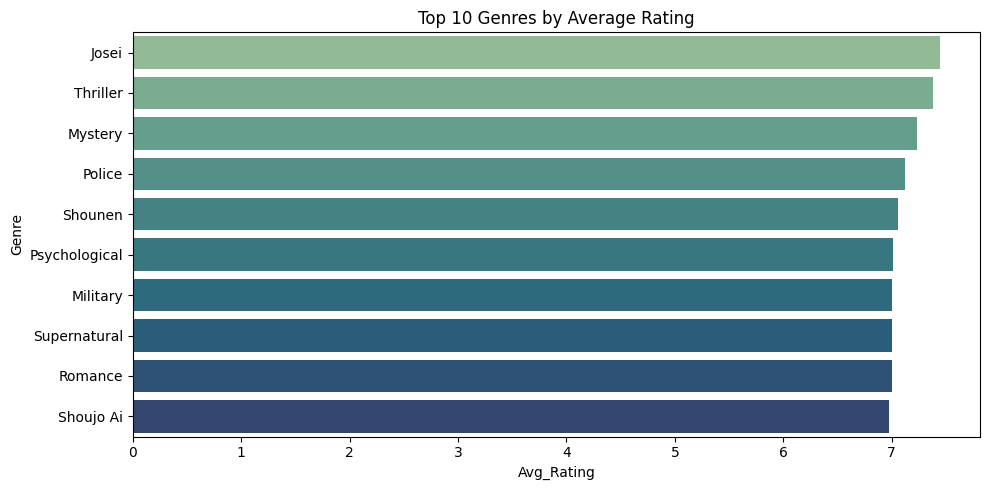

C:\Users\yashs\AppData\Local\Temp\ipykernel_24344\2927600701.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Rating', y='Genre', data=avg_genre_df.tail(10), palette='flare')


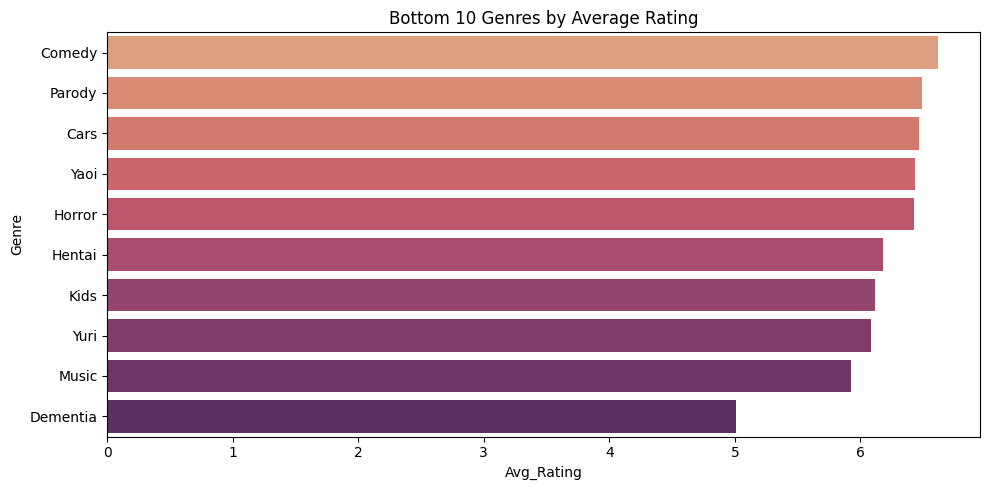

In [27]:
#trying to find the average rating vs genre 
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dictionary to collect ratings for each genre
genre_ratings = defaultdict(list)

# Fill the dictionary
for _, row in df.iterrows():
    for genre in row['genre']:
        genre_ratings[genre].append(row['rating'])

# Calculate average rating for each genre
avg_genre_ratings = {genre: sum(ratings)/len(ratings) for genre, ratings in genre_ratings.items()}

# Convert to DataFrame
avg_genre_df = pd.DataFrame(avg_genre_ratings.items(), columns=['Genre', 'Avg_Rating']).sort_values(by='Avg_Rating', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 5))
sns.barplot(x='Avg_Rating', y='Genre', data=avg_genre_df.head(10), palette='crest')
plt.title('Top 10 Genres by Average Rating')
plt.tight_layout()
plt.show()

# Plot bottom 10
plt.figure(figsize=(10, 5))
sns.barplot(x='Avg_Rating', y='Genre', data=avg_genre_df.tail(10), palette='flare')
plt.title('Bottom 10 Genres by Average Rating')
plt.tight_layout()
plt.show()


It shows genre does influence ratings:

Top-rated genres (avg > 7) likely include deep or emotionally impactful types like Psychological, Drama, Thriller, etc.

Lower-rated genres (avg ~6 or less) might be more niche, inconsistent, or formulaic (Ecchi, Kids, etc.)

C:\Users\yashs\AppData\Local\Temp\ipykernel_24344\135394287.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre_Combo', data=combo_df.head(50), palette='mako')


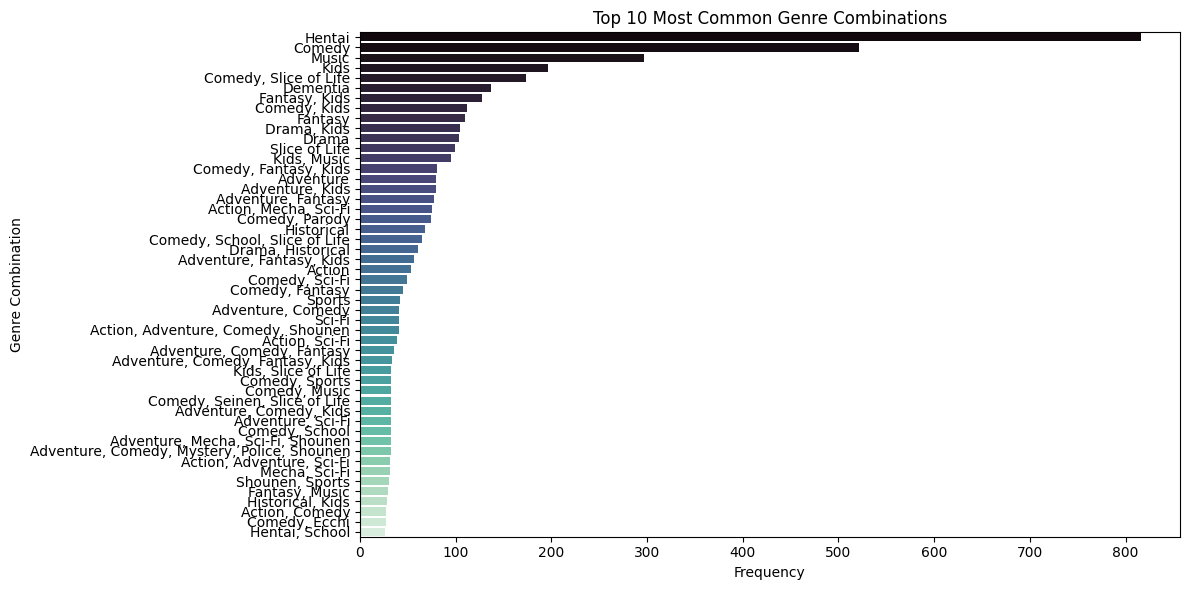

In [28]:
##we are tryna find the combinatios 
# Step 1: Convert genre lists to sorted, comma-separated strings
df['genre_combo'] = df['genre'].apply(lambda g: ', '.join(sorted(g)))

# Step 2: Count frequency of each unique combination
combo_counts = Counter(df['genre_combo'])

# Step 3: Convert to DataFrame and sort
combo_df = pd.DataFrame(combo_counts.items(), columns=['Genre_Combo', 'Count']).sort_values(by='Count', ascending=False)

# Step 4: Plot top 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre_Combo', data=combo_df.head(50), palette='mako')
plt.title('Top 10 Most Common Genre Combinations')
plt.xlabel('Frequency')
plt.ylabel('Genre Combination')
plt.tight_layout()
plt.show()

In [29]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [30]:
df.head()

,name,genre,rating,members,genre_combo
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37,200630,"Drama, Romance, School, Supernatural"
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S..."
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17,673572,"Sci-Fi, Thriller"
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S..."


In [31]:
df.head(10)

,name,genre,rating,members,genre_combo
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37,200630,"Drama, Romance, School, Supernatural"
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S..."
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17,673572,"Sci-Fi, Thriller"
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S..."
5,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"[Comedy, Drama, School, Shounen, Sports]",9.15,93351,"Comedy, Drama, School, Shounen, Sports"
6,Hunter x Hunter (2011),"[Action, Adventure, Shounen, Super Power]",9.13,425855,"Action, Adventure, Shounen, Super Power"
7,Ginga Eiyuu Densetsu,"[Drama, Military, Sci-Fi, Space]",9.11,80679,"Drama, Military, Sci-Fi, Space"
8,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"[Action, Comedy, Historical, Parody, Samurai, ...",9.10,72534,"Action, Comedy, Historical, Parody, Samurai, S..."
9,Gintama&#039;: Enchousen,"[Action, Comedy, Historical, Parody, Samurai, ...",9.11,81109,"Action, Comedy, Historical, Parody, Samurai, S..."


In [32]:
df['genre_processed'] = df['genre'].apply(lambda g: ' '.join(g).lower()) #removing the commas and lowercasing them 


In [33]:
df.head()

,name,genre,rating,members,genre_combo,genre_processed
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37,200630,"Drama, Romance, School, Supernatural",drama romance school supernatural
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili...",action adventure drama fantasy magic military ...
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S...",action comedy historical parody samurai sci-fi...
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17,673572,"Sci-Fi, Thriller",sci-fi thriller
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S...",action comedy historical parody samurai sci-fi...


vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the genre_processed column
genre_tfidf = tfidf.fit_transform(df['genre_processed'])


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_members = scaler.fit_transform(df[['members']])

In [36]:
normalized_rating = scaler.fit_transform(df[['rating']])

In [37]:
from scipy.sparse import hstack
final_features = hstack([genre_tfidf, normalized_members, normalized_rating])


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(final_features)

In [39]:
df.head()

,name,genre,rating,members,genre_combo,genre_processed
0,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",9.37,200630,"Drama, Romance, School, Supernatural",drama romance school supernatural
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili...",action adventure drama fantasy magic military ...
2,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S...",action comedy historical parody samurai sci-fi...
3,Steins;Gate,"[Sci-Fi, Thriller]",9.17,673572,"Sci-Fi, Thriller",sci-fi thriller
4,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S...",action comedy historical parody samurai sci-fi...


In [40]:
similarity_matrix = similarity_matrix.astype('float32') #all this does is decraese the value from the default float64 to float32 which decreases the file size(check notes for more info)

In [41]:
def recommend(anime_name, df, similarity_matrix, top_n=5):
    # Get index of the anime
    idx = df[df['name'].str.lower() == anime_name.lower()].index
    if len(idx) == 0:
        return "Anime not found."
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Sort by similarity (excluding the anime itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get recommended anime names
    recommended = df.iloc[[i[0] for i in sim_scores]]['name'].tolist()
    return recommended


In [42]:
recommend("Bleach", df, similarity_matrix)

['Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu',
 'Bleach Movie 4: Jigoku-hen',
 'K',
 'Katekyo Hitman Reborn!',
 'Code:Breaker']

In [43]:
import pickle
pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(similarity_matrix, open('similarity_1.pkl', 'wb'))